In [71]:
"""
Author: EE19MTECH01008
Q2) Disparity map between stereo images
"""

%matplotlib inline

import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [77]:
#read images
x = cv2.imread("HW0-left.png",cv2.IMREAD_GRAYSCALE)
y = cv2.imread("HW0-right.png",cv2.IMREAD_GRAYSCALE)

In [78]:
#calculate the phi_s(ds) here; ds is varied from 0 to 10; variance is 3
for d in range(0,10):
    s = np.zeros((10,x.shape[0]-10,x.shape[1]))
    for i in range(0,x.shape[0]-10):
            for j in range (0,x.shape[1]):
                s[d,i,j] = np.exp(-(1/9)*(x[i][j]-y[i+d+1][j])**2)

#calculate the phi_s(ds)phi_t(dt) here ; variance is 3
t = np.zeros((10,10))                
for i in range(0,t.shape[0]):
    for j in range (0,t.shape[1]):
            t[i,j] = np.exp(-(1/9)*np.minimum((i-j)**2,7**2))
    
#the sum-product algorithm
#here i have taken the upper, left, right and lower pixel values
for i in range(1,s.shape[1]-1):
    for j in range(1,s.shape[2]-1):
            t1=np.matmul(t,s[:,i+1,j+1])
            t2=np.matmul(t,s[:,i,j-1])
            t3=np.matmul(t,s[:,i,j+1])
            t4=np.matmul(t,s[:,i-1,j])
            p=(np.multiply(t1,t2,t3))/9
            k[:,i,j]=np.multiply(p,t4)            
            disparity[i,j]=np.argmax(k[:,i,j])*255
            

/home/neo/anaconda3/envs/dnn_torch/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in ubyte_scalars
  


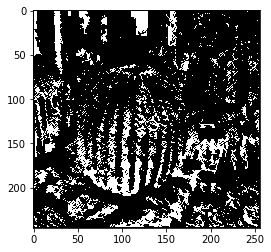

In [79]:
#convert numpy array to image using PIL
img = Image.fromarray(disparity)
plt.imshow(img)

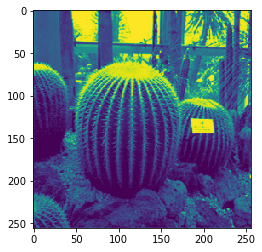

In [80]:
plt.imshow(x)
plt.show()

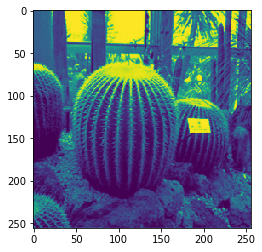

In [81]:
plt.imshow(y)
plt.show()